<a href="https://colab.research.google.com/github/ej970221/ORIE-4580/blob/main/HW5_KJ%2CER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 5

#### Students: Eunyoung Katie Jung (ej97) and Emuna Rouhani (er443)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


Discussed problems with Amy Chitnumsab (ac2295),
Shiyu Chen (sc3283)

Visited Office hours.

### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.
Let $n$ represent the total population of red-tailed hawks in Ithaca. We could use the first moment of expectation. Using the Poisson property of thinning, we can set up the following equality:

$ Poisson (\frac{10}{n} \cdot \lambda) = 6 $

$n = \frac{10}{6} \cdot \lambda = \frac{10}{6} \cdot 28.8 = 48$

___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.



Let $n$ represent the hawk population. We rewrite the pmf as:

Probability of observing 20 unique birds, out of which 4 are tagged $= \frac{event}{all outcomes} =$ ${ {10 \choose 4} {n-10 \choose 16}} \over{n \choose 20}$

$n\approx49$

___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


## Ans.


When $N_i < 40, Y = N_i$

When $N_i \ge 40, Y = 40$

The total demand for each day is a geometric random variable where $P(N = k) = (1-p)^kp$, $k \ge 0$

Therefore, when $Y < 40,\  P(N=Y) = (1-p)^kp$
However, since it is alwys going to be 40 whenever Y is greater than or equal to 40, therefore, when $ Y \ge 40, P(N=Y) = P(N=40) = (1-p)^{40}$

___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

## Ans.


$L(p) = \prod_{j=1}^z (1-p)^{40}\cdot \prod_{i=1}^x (1-p)^{Y_i} \cdot p $

= $(1-p)^{40z} \cdot \sum_{i=1}^x(1-p)^{Y_i} \cdot p^x$

Therefore,

$log(L) = 40z\ log(1-p) + \sum_{i=1}^x(1-p)^{Y_i}\ log(1-p) + x \ log( p)$

MLE is at where $\frac{dlog(L)}{dp}= 0 $


Therefore, $\frac{dlog(L)}{dp} = \frac{-40z}{1-p}+ \frac{-\sum_{i=1}^x{Y_i}}{1-p}+\frac{x}{p}$

= $\frac{-40z +-\sum_{i=1}^x{Y_i}}{1-p} + \frac{x}{p}=0$

Therefore, $p(-40z +-\sum_{i=1}^x{Y_i})+x(1-p) = (-40z +-\sum_{i=1}^x{Y_i}-x)p+x = 0$

Therefore, $p = \frac{x}{-(-40z +-\sum_{i=1}^x{Y_i}-x)}= \frac{x}{(40z +\sum_{i=1}^x{Y_i}+x)} $

In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
import pandas as pd
df = pd.read_csv('Soup_sales_data.csv')

In [4]:
import numpy as np
x = len(df[df['Y']<40])
z = len(df[df['Y']== 40])

Y = df['Y']
sum = np.sum(Y[Y < 40])

mle_p = x / (sum + 40 * z +x)
print(mle_p)

0.02679658952496955


Reference:ChatGPT

___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.

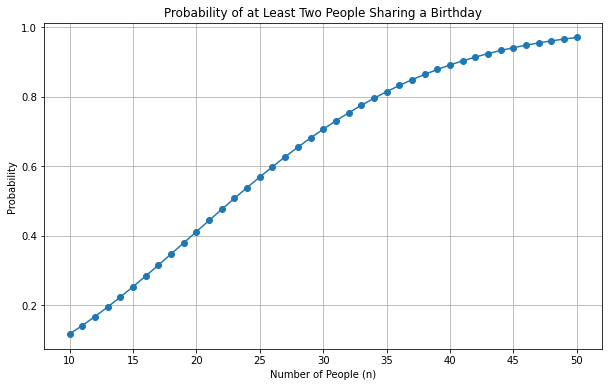

In [ ]:
import matplotlib.pyplot as plt

def probability_no_shared_birthdays(n):
    prob = 1.0
    for i in range(n):
        prob *= (365 - i) / 365
    return prob

n_values = list(range(10, 51))
probabilities = [1 - probability_no_shared_birthdays(n) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities, marker='o', linestyle='-')
plt.title("Probability of at Least Two People Sharing a Birthday")
plt.xlabel("Number of People (n)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


Reference:ChatGPT

___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

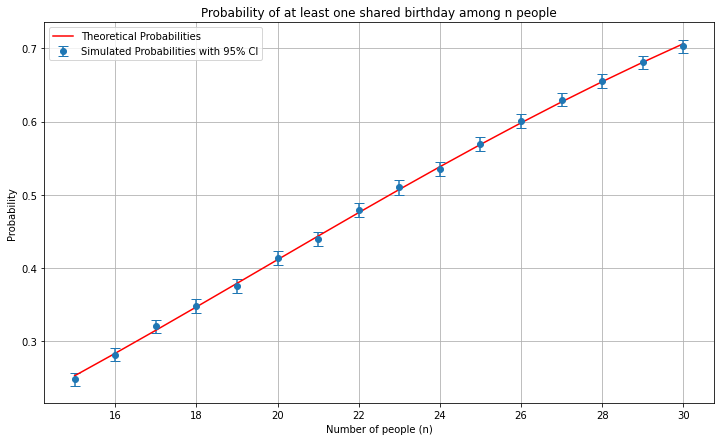

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Functions from previous step for theoretical probabilities
def probability_no_shared_birthday(n):
    prob = 1.0
    for i in range(n):
        prob *= (365 - i) / 365
    return prob

def probability_shared_birthday(n):
    return 1 - probability_no_shared_birthday(n)

# Simulation
def simulate_birthday_problem(n, trials=10000):
    count_shared = 0
    for _ in range(trials):
        birthdays = np.random.choice(365, n, replace=True)
        if len(birthdays) != len(set(birthdays)):
            count_shared += 1
    return count_shared / trials

# Calculating 95% CI
def confidence_interval(p, trials):
    MOE = 1.96 * np.sqrt(p*(1-p)/trials)
    return (p - MOE, p + MOE)

n_values = list(range(15, 31))
simulated_probabilities = []
lower_bounds = []
upper_bounds = []

T = 10000
for n in n_values:
    p = simulate_birthday_problem(n, T)
    simulated_probabilities.append(p)
    lb, ub = confidence_interval(p, T)
    lower_bounds.append(lb)
    upper_bounds.append(ub)

# Theoretical probabilities
theoretical_probs = [probability_shared_birthday(n) for n in n_values]

# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(n_values, simulated_probabilities, yerr=[simulated_probabilities[i] - lower_bounds[i] for i in range(len(n_values))], fmt='o', label='Simulated Probabilities with 95% CI', capsize=5)
plt.plot(n_values, theoretical_probs, 'r-', label='Theoretical Probabilities')
plt.title("Probability of at least one shared birthday among n people")
plt.xlabel("Number of people (n)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


Reference:ChatGPT

## Ans.



---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

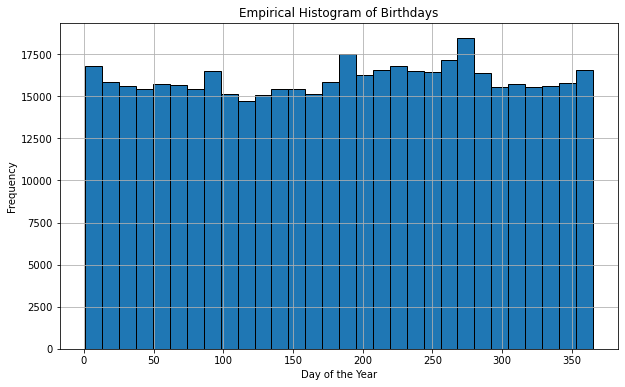

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
with open('bdaydata.txt', 'r') as file:
    lines = file.readlines()

# Extract counts from the lines
counts = [int(line.split()[1]) for line in lines[1:]]

# Create an empirical histogram
plt.figure(figsize=(10, 6))
plt.hist(range(1, 366), bins=30, weights=counts, edgecolor='black')
plt.title("Empirical Histogram of Birthdays")
plt.xlabel("Day of the Year")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


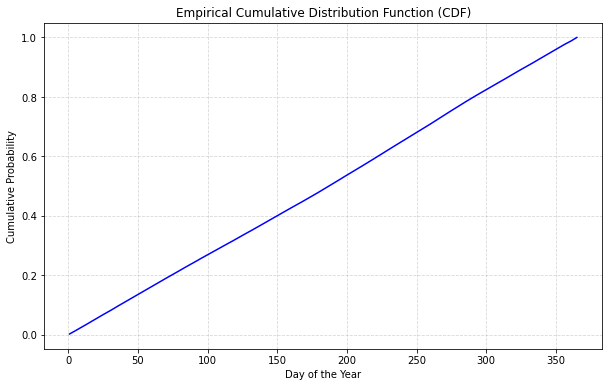

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
with open('bdaydata.txt', 'r') as file:
    lines = file.readlines()

# Extract counts from the lines
counts = [int(line.split()[1]) for line in lines[1:]]

# Calculate empirical CDF
total_counts = sum(counts)
cumulative_counts = np.cumsum(counts) / total_counts

# Create the empirical CDF plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 366), cumulative_counts, color='blue')
plt.title("Empirical Cumulative Distribution Function (CDF)")
plt.xlabel("Day of the Year")
plt.ylabel("Cumulative Probability")
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()


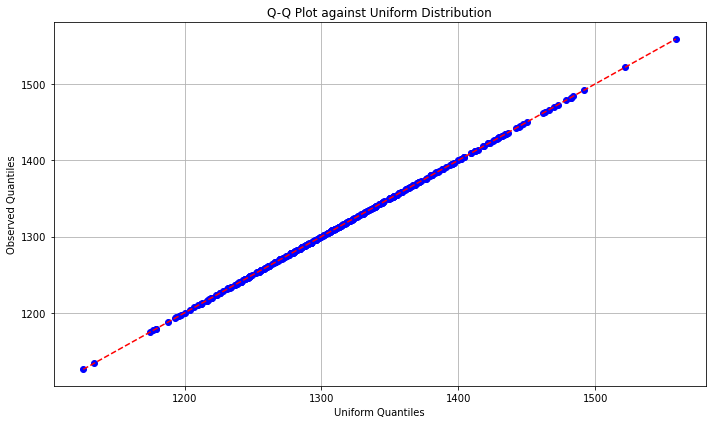

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rank the observed counts
sorted_counts = sorted(counts)

# Generate uniform quantiles
uniform_quantiles = [np.percentile(sorted_counts, p) for p in np.linspace(0, 100, len(sorted_counts))]

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
plt.plot(uniform_quantiles, sorted_counts, marker='o', linestyle='', color='blue')
plt.plot([min(uniform_quantiles), max(uniform_quantiles)],
         [min(uniform_quantiles), max(uniform_quantiles)],
         color='red', linestyle='--')
plt.title("Q-Q Plot against Uniform Distribution")
plt.xlabel("Uniform Quantiles")
plt.ylabel("Observed Quantiles")
plt.grid(True)
plt.tight_layout()
plt.show()


Reference:ChatGPT

___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


In [ ]:
from scipy.stats import chisquare

# Calculate expected counts for a uniform distribution
total_birthdays = sum(counts)
print(total_birthdays)
expected_counts = [total_birthdays / 365] * 365

# Perform Chi-square test
chi2_stat, chi2_p_val = chisquare(counts, expected_counts)

print(chi2_stat, chi2_p_val)

480715
1352.7233599950073 1.2489373800065057e-113


1352.7233599950073 represents the sum of the squared differences between the observed and expected counts, divided by the expected counts. A large chi-squared statistic suggests that the observed and expected frequencies are different.

The p-value represents the probability of obtaining a test statistic as extreme as, or more extreme than, the one computed from the sample, assuming that the null hypothesis is true.

For the Chi-square goodness-of-fit test:

Null Hypothesis ($H_0$): The observed frequencies follow the expected (uniform) distribution.

Alternative Hypothesis ($H_1$): The observed frequencies do not follow the expected distribution.

Interpretation:

The p-value is incredibly small (essentially zero for all practical purposes).
Typically, a significance level (alpha) of 0.05 is used. If the p-value is less than or equal to 0.05, you would reject the null hypothesis.
Given our p-value is way smaller than 0.05 (or any reasonable significance level), we reject the null hypothesis.
The conclusion is that the birthday data does not follow a uniform distribution. The observed frequencies of birthdays significantly deviate from what we would expect if birthdays were uniformly distributed across the days of the year.

In [ ]:
from scipy.stats import kstest

# Normalize the counts to create a probability distribution
proportions = [count / total_birthdays for count in counts]

# Perform K-S test against a uniform distribution
ks_stat, ks_p_val = kstest(proportions, 'uniform')

print(ks_stat, ks_p_val)

0.9967569141799195 0.0


Test Statistic (ks_stat): 0.9967569141799195

This value is the maximum difference between the empirical cumulative distribution function (CDF) of the observed data and the CDF of the theoretical uniform distribution. The K-S test statistic quantifies the greatest vertical distance between the two CDFs. A larger K-S statistic suggests a larger discrepancy between the observed data and the theoretical distribution.

P-value (ks_p_val): 0

The p-value in the context of the K-S test tells us the probability of observing a test statistic as extreme as, or more extreme than, the one computed, assuming that the null hypothesis is true. A p-value of 0 is an indication that the test statistic is highly significant, suggesting that the observed sample deviates significantly from the theoretical distribution. Given our p-value is 0, which is smaller than 0.05 (or any reasonable significance level), we reject the null hypothesis. Therefore, the birthday data does not come from a uniform distribution. The observed distribution of birthdays significantly differs from a uniform distribution across the days of the year. The K-S test provides strong evidence against the hypothesis that the data is uniformly distributed.

Reference:ChatGPT

___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


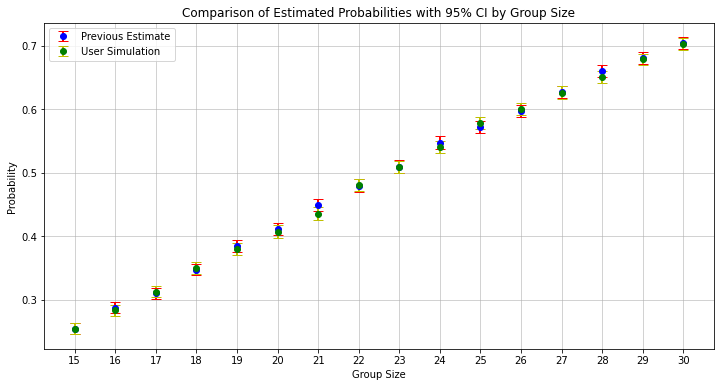

In [ ]:
# Defining n_values as a list of group sizes from 15 to 30
n_values = list(range(15, 31))

# Running the simulation and calculation again with the defined n_values
simulated_probabilities_user = []
lower_bounds_user = []
upper_bounds_user = []

for n in n_values:
    p = simulate_birthday_problem(n, T)
    simulated_probabilities_user.append(p)
    lb, ub = confidence_interval(p, T)
    lower_bounds_user.append(lb)
    upper_bounds_user.append(ub)

# Creating the combined plot
plt.figure(figsize=(12, 6))

# Plotting the previous results
plt.errorbar(group_sizes, probabilities, yerr=errors, fmt='o', capsize=5, color='b', ecolor='r', elinewidth=2, label='Previous Estimate')

# Plotting the user's simulation results
plt.errorbar(n_values, simulated_probabilities_user, yerr=[simulated_probabilities_user[i] - lower_bounds_user[i] for i in range(len(lower_bounds_user))], fmt='o', capsize=5, color='g', ecolor='y', elinewidth=2, label='User Simulation')

plt.xlabel('Group Size')
plt.ylabel('Probability')
plt.title('Comparison of Estimated Probabilities with 95% CI by Group Size')
plt.xticks(n_values)
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend()
plt.show()


Reference:ChatGPT

___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

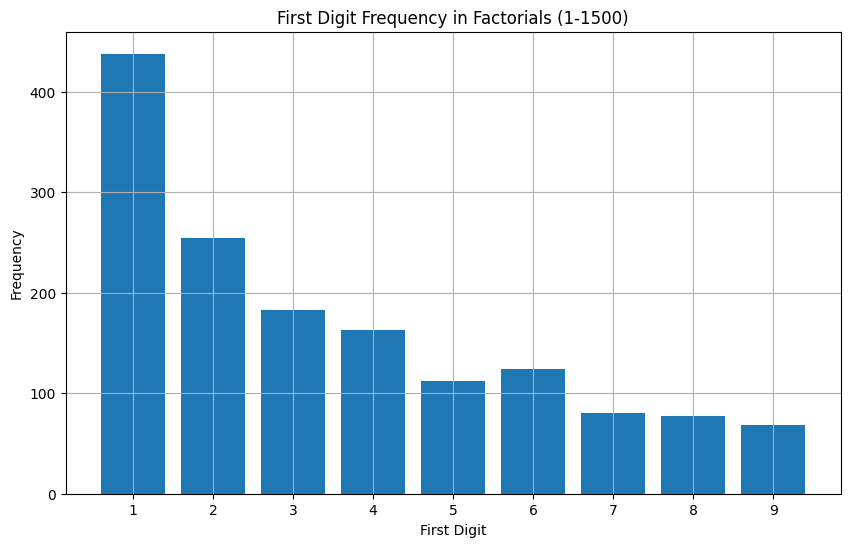

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.special import factorial


n = 1500
n_fact = factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)
for i in range(n):
  first_digit[i] = int(str(n_fact[i])[0])

count = np.zeros(10)
for i in range(1, 10):
    count[i] = np.sum(first_digit == i)

plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 10), count[1:], tick_label=np.arange(1, 10))
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('First Digit Frequency in Factorials (1-1500)')
plt.grid(True)
plt.show()


Reference:ChatGPT

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [8]:
from scipy.stats import chisquare

e_unif = np.full(9, n/9) #expected value

chi_stat, p = chisquare(count[1:], f_exp=e_unif)

print("Chi2 Stat:", chi_stat)
print("P Value:", p)

Chi2 Stat: 670.8000000000002
P Value: 1.3805718582880795e-139


Reference:ChatGPT

___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [10]:
import scipy

benf_p = [np.log10(d + 1) - np.log10(d) for d in range(1, 10)]

# Calculate the expected frequencies for each digit
e_benf = np.array(benf_p) * n

# Running the chi-square test
chi_stat, p = scipy.stats.chisquare(count[1:], f_exp = e_benf)

print("Chi2 Stat:", chi_stat)
print("P Value:", p)


Chi2 Stat: 9.456569118464648
P Value: 0.3052548339606756


Reference:ChatGPT

___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [12]:
import pandas as pd
df = pd.read_csv('us_pop.csv')

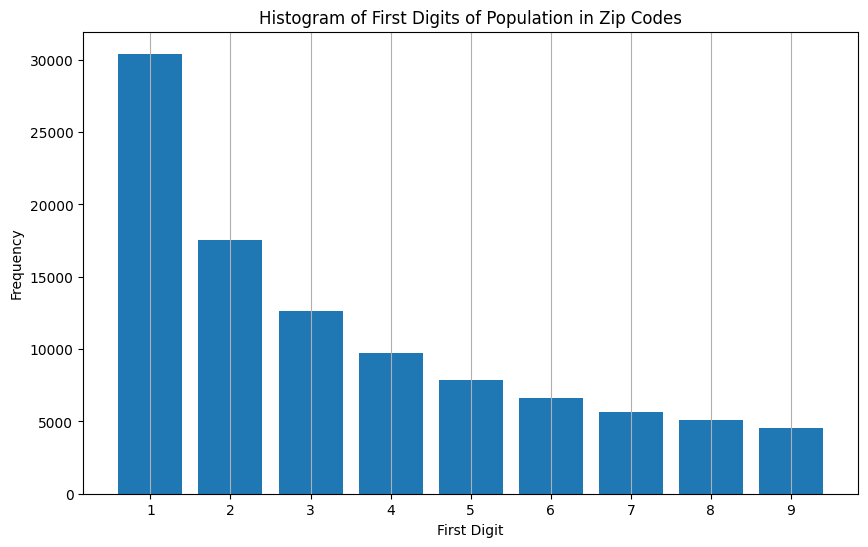

In [13]:
pp = df['population']

numone = pp.astype(str).str[0].astype(int) #first digit

plt.figure(figsize=(10, 6))
numone.hist(bins=range(1, 11), align='left', rwidth=0.8)
plt.xticks(range(1, 10))
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('Histogram of First Digits of Population in Zip Codes')
plt.grid(axis='y')

plt.show()

In [14]:
from scipy.stats import chisquare
import numpy as np

count = numone.value_counts().sort_index()

e_unif = np.full(9, len(numone) / 9)

chi_stat, p = chisquare(count, e_unif)

print("Chi-square Statistic (Uniform):", chi_stat)
print("P-value (Uniform):", p)

Chi-square Statistic (Uniform): 50323.53572
P-value (Uniform): 0.0


In [15]:
benf_p = np.log10(1 + 1 / np.arange(1, 10)) #faster way to compute benford's law referenced by chatGPT
e_benf = benf_p * len(numone)

# Perform the chi-square test
chi_stat, p = chisquare(count, e_benf)

print("Chi-square Statistic (Benford):", chi_stat)
print("P-value (Benford):", p)

Chi-square Statistic (Benford): 11.843226818111097
P-value (Benford): 0.15833698137848726


Reference:ChatGPT

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.